In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print original shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images to 1D arrays as Random Forest expects 2D input (samples x features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Print flattened shapes
print(f"Flattened training data shape: {X_train_flat.shape}")
print(f"Flattened test data shape: {X_test_flat.shape}")

# Flatten label arrays to 1D
y_train = y_train.ravel()
y_test = y_test.ravel()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)
Flattened training data shape: (50000, 3072)
Flattened test data shape: (10000, 3072)


In [ ]:
# Task 2: Model Training

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50],          # Number of trees
    'max_depth': [10],             # Maximum depth of each tree
    'min_samples_split': [2],      # Minimum samples required to split a node
    'min_samples_leaf': [1]        # Minimum samples required at each leaf node
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Setup GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                          # 3-fold cross-validation
    n_jobs=-1,                     # Use all cores
    verbose=2,                     # Show progress
    scoring='accuracy'            # Use accuracy as evaluation metric
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_flat, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# (Optional) Re-train the best model explicitly (not needed, already trained)
best_rf_model.fit(X_train_flat, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = best_rf_model.predict(X_test_flat)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4283

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53      1000
           1       0.48      0.52      0.50      1000
           2       0.37      0.16      0.23      1000
           3       0.32      0.18      0.23      1000
           4       0.34      0.41      0.37      1000
           5       0.38      0.37      0.38      1000
           6       0.39      0.56      0.46      1000
           7       0.44      0.41      0.42      1000
           8       0.53      0.58      0.55      1000
           9       0.44      0.56      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



Accuracy: 0.4283
Precision: 0.4219
Recall: 0.4283
F1-score: 0.4165

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53      1000
           1       0.48      0.52      0.50      1000
           2       0.37      0.16      0.23      1000
           3       0.32      0.18      0.23      1000
           4       0.34      0.41      0.37      1000
           5       0.38      0.37      0.38      1000
           6       0.39      0.56      0.46      1000
           7       0.44      0.41      0.42      1000
           8       0.53      0.58      0.55      1000
           9       0.44      0.56      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000



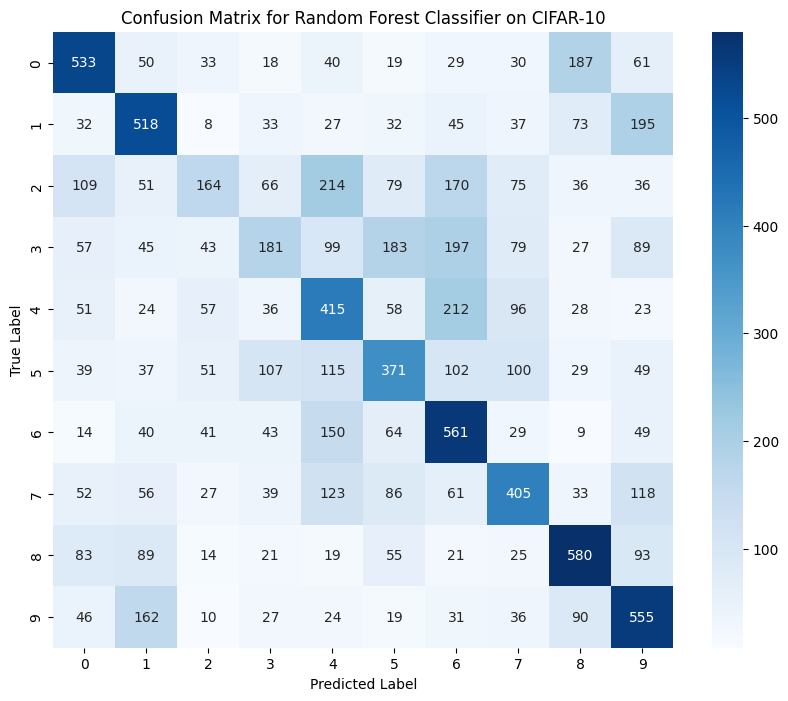

In [ ]:
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1. Make predictions on the test set
y_pred = best_rf_model.predict(X_test_flat)

# 3.2. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 3.3. Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# 3.4. Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier on CIFAR-10')
plt.show()


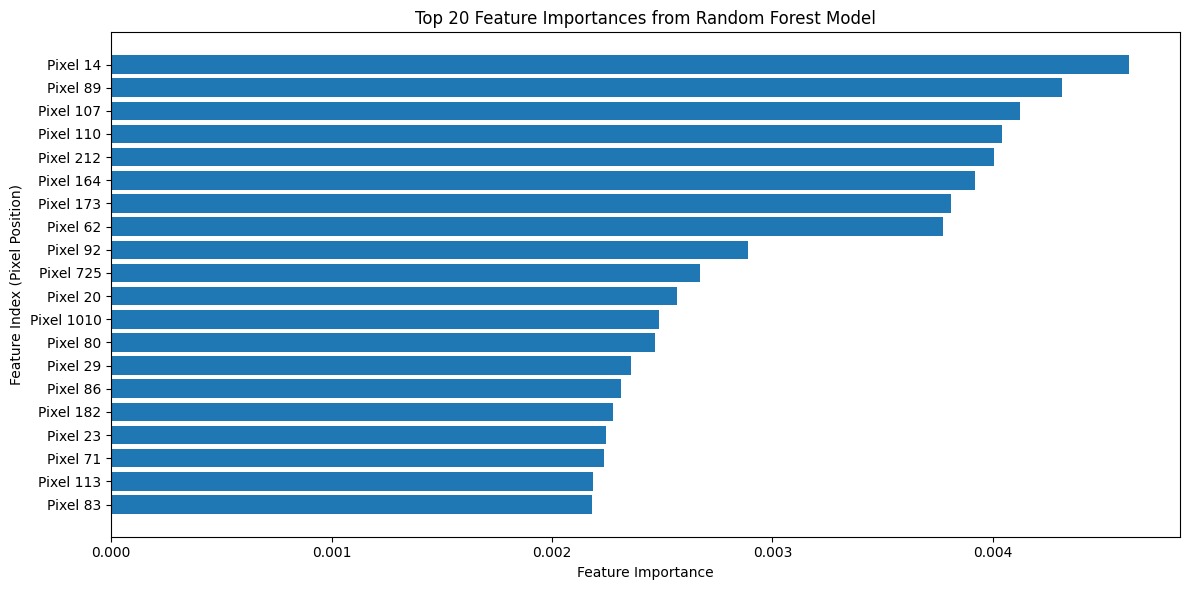

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract feature importances from the trained Random Forest model
importances = best_rf_model.feature_importances_

# 2. Identify indices of the top 20 important features
indices = np.argsort(importances)[-20:]

# 3. Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [f'Pixel {i}' for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index (Pixel Position)')
plt.title('Top 20 Feature Importances from Random Forest Model')
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from google.colab import files  # For uploading images in Colab

# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Function to preprocess the image
def preprocess_image(image_path):
    """
    Load and preprocess an image to match training data format:
    - Read the image.
    - Resize to 32x32 pixels.
    - Convert BGR to RGB.
    - Normalize pixel values to [0, 1].
    - Flatten to 1D array.
    """
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")

    image_resized = cv2.resize(image, (32, 32))
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    image_normalized = image_rgb.astype('float32') / 255.0
    image_flatten = image_normalized.flatten().reshape(1, -1)
    return image_flatten

# Function to make prediction
def predict_image_class(image_path):
    processed_image = preprocess_image(image_path)
    prediction = best_rf_model.predict(processed_image)[0]
    predicted_label = class_labels[prediction]
    print(f"Predicted class for the image is: {predicted_label}")
    return predicted_label

# Upload and predict
uploaded = files.upload()  # Opens a file dialog in Colab

# Predict for each uploaded image
for filename in uploaded.keys():
    print(f"\nUploaded file: {filename}")
    predict_image_class(filename)


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier (you can adjust the kernel and other params)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
print("Training SVM classifier... This might take some time depending on your machine.")
svm_model.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_flat)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Training SVM classifier... This might take some time depending on your machine.
